In [24]:
# mengimport library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
                            AdaBoostClassifier, GradientBoostingClassifier

plt.rcParams['figure.figsize'] = (10, 7)

In [26]:
# membaca data
df = pd.read_csv("DEATH.csv", sep=";")
df.head(5)

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2016,40,All ages,0,"0,545138889"
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2017,41,All ages,0,14
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2018,42,All ages,0,"0,584722222"
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,"0,084027778",2016,40,All ages,0,"0,877777778"
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,"0,084027778",2017,41,All ages,0,"0,919444444"


In [81]:
# menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INDICATOR       600 non-null    object
 1   UNIT            600 non-null    object
 2   UNIT_NUM        600 non-null    int64 
 3   STUB_NAME       600 non-null    object
 4   STUB_NAME_NUM   600 non-null    int64 
 5   STUB_LABEL      600 non-null    object
 6   STUB_LABEL_NUM  600 non-null    object
 7   YEAR            600 non-null    int64 
 8   YEAR_NUM        600 non-null    int64 
 9   AGE             600 non-null    object
 10  AGE_NUM         600 non-null    int64 
 11  ESTIMATE        576 non-null    object
dtypes: int64(5), object(7)
memory usage: 56.4+ KB


## Missing Value

In [83]:
# untuk mengetahui jumlah missing value
np.sum(df.isnull())

INDICATOR          0
UNIT               0
UNIT_NUM           0
STUB_NAME          0
STUB_NAME_NUM      0
STUB_LABEL         0
STUB_LABEL_NUM     0
YEAR               0
YEAR_NUM           0
AGE                0
AGE_NUM            0
ESTIMATE          24
dtype: int64

In [89]:
df = df.dropna(thresh=len(df) * 0.7)  # Menghapus baris dengan >30% nilai hilang

In [91]:
np.sum(df.isnull()) 

INDICATOR         0.0
UNIT              0.0
UNIT_NUM          0.0
STUB_NAME         0.0
STUB_NAME_NUM     0.0
STUB_LABEL        0.0
STUB_LABEL_NUM    0.0
YEAR              0.0
YEAR_NUM          0.0
AGE               0.0
AGE_NUM           0.0
ESTIMATE          0.0
dtype: float64

## Outlier

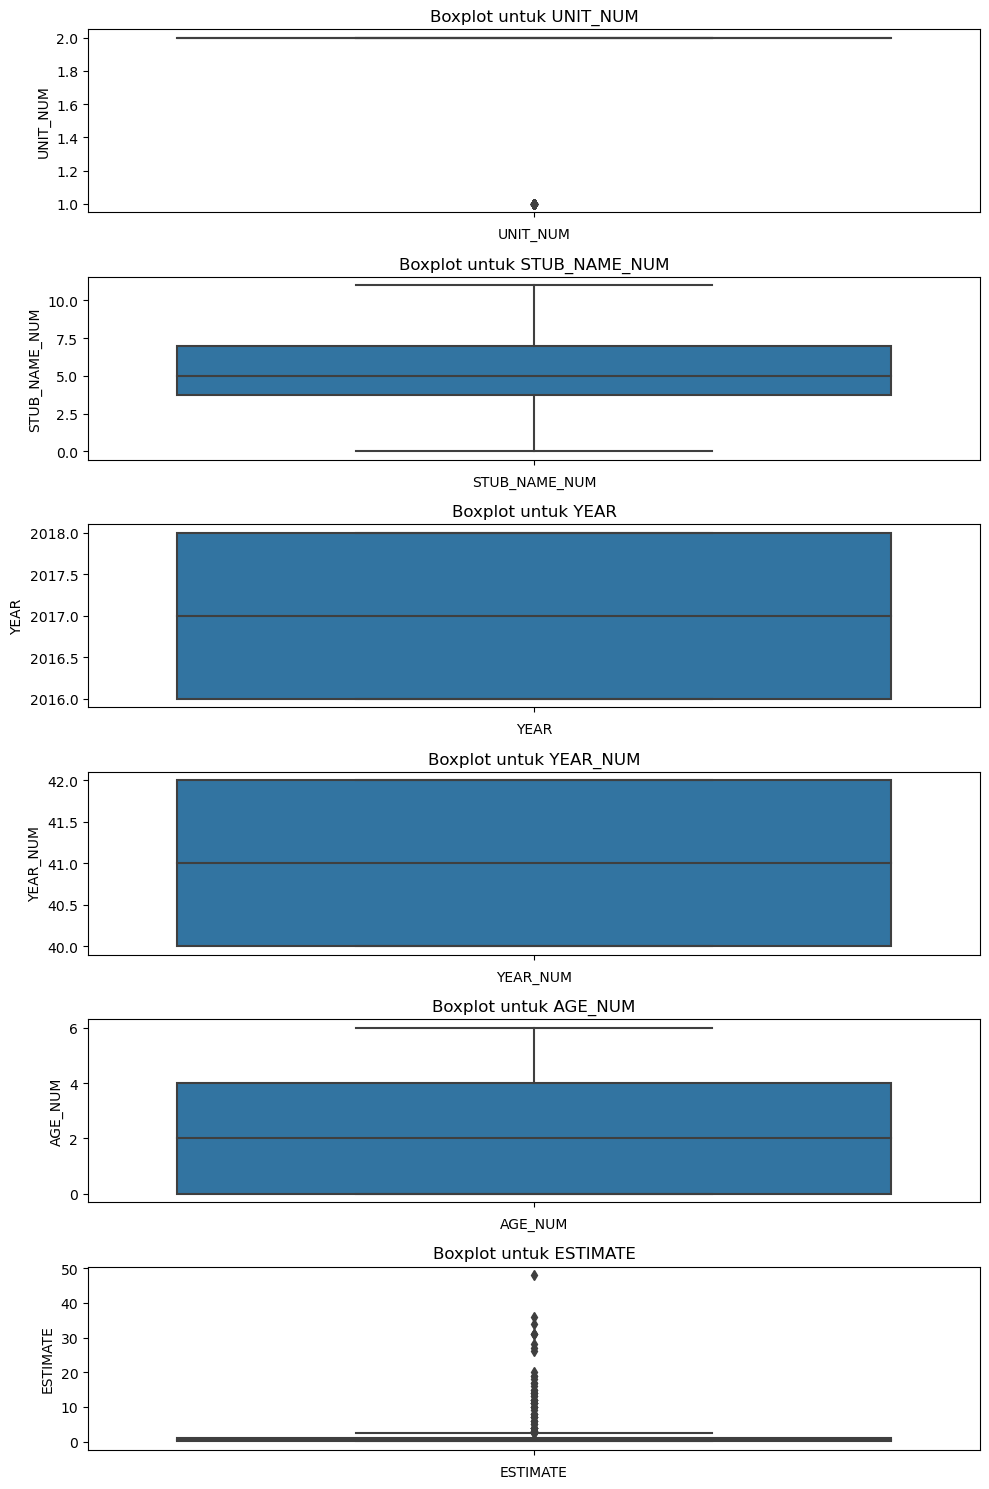

In [93]:
# Mendapatkan semua kolom numerik
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot untuk {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

1. Boxplot untuk UNIT_NUM
Boxplot untuk UNIT_NUM menunjukkan bahwa semua data berada pada nilai 1.

2. Boxplot untuk STUB_NAME_NUM
Boxplot untuk STUB_NAME_NUM menunjukkan bahwa median data berada pada nilai 6,5.
Rentang interkuartil (IQR) adalah sekitar 2,5.
(Tidak ada outlier)

3. Boxplot untuk YEAR
Boxplot untuk YEAR menunjukkan bahwa median data berada pada nilai 2017,5.
Rentang interkuartil (IQR) adalah sekitar 0,5.
(Tidak ada outlier)

4. Boxplot untuk YEAR_NUM
Boxplot untuk YEAR_NUM menunjukkan bahwa median data berada pada nilai 41.
Rentang interkuartil (IQR) adalah sekitar 0,5.
(Tidak ada outlier)

5. Boxplot untuk AGE_NUM
Boxplot untuk AGE_NUM menunjukkan bahwa median data berada pada nilai 4.
Rentang interkuartil (IQR) adalah sekitar 1.
(Tidak ada outlier)

6. Boxplot untuk ESTIMATE
Boxplot untuk ESTIMATE menunjukkan bahwa median data berada pada nilai sekitar 25.
Rentang interkuartil (IQR) adalah sekitar 10.
(Ada beberapa outlier, yang berada di atas kumis atas)

## Transformasi

melakukan scaling pada kolom 'ESTIMATE' dalam dataset 'data' menggunakan StandardScaler dari library sklearn, kemudian menampilkan histogram dari data sebelum dan sesudah scaling

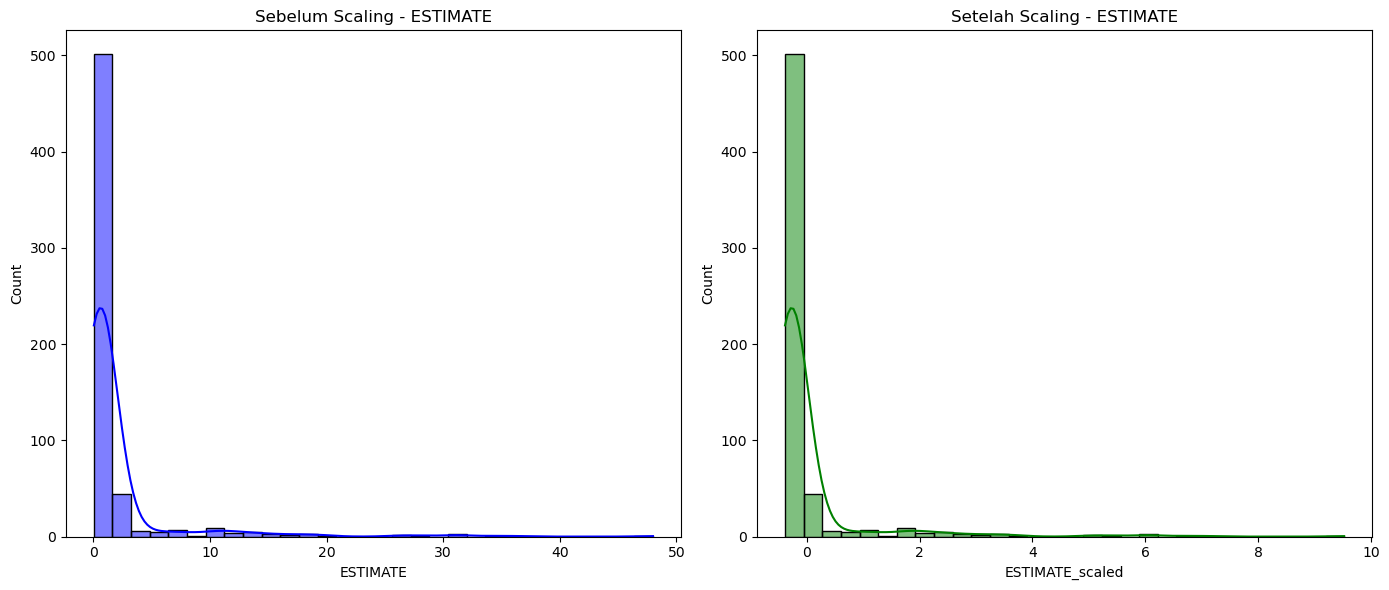

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Melakukan scaling pada kolom 'ESTIMATE'
scaler = StandardScaler()
data['ESTIMATE_scaled'] = scaler.fit_transform(data[['ESTIMATE']])

# Visualisasi
plt.figure(figsize=(14, 6))

# Visualisasi sebelum scaling
plt.subplot(1, 2, 1)
sns.histplot(data['ESTIMATE'], bins=30, kde=True, color='blue')
plt.title('Sebelum Scaling - ESTIMATE')

# Visualisasi setelah scaling
plt.subplot(1, 2, 2)
sns.histplot(data['ESTIMATE_scaled'], bins=30, kde=True, color='green')
plt.title('Setelah Scaling - ESTIMATE')

plt.tight_layout()
plt.show()

Sebelum Scaling: Distribusi data ESTIMATE memiliki rentang yang lebih luas, dengan nilai maksimum sekitar 50.

Setelah Scaling: Distribusi data ESTIMATE_scaled memiliki rentang yang lebih sempit, dengan nilai maksimum sekitar 10